<a href="https://colab.research.google.com/github/RuwaAbey/Finaly_Year_Project_G09/blob/main/Collective_activity_keypoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install torch==2.1.0+cu118 torchvision==0.16.0+cu118 torchaudio==2.1.0+cu118 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
# check NVCC version
!nvcc -V

# check GCC version
!gcc --version

# check python in conda environment
!which python

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

/usr/local/bin/python


In [3]:
import torch
import torchvision
import torchaudio
print("Torch version:", torch.__version__)

print("Torch version:", torchvision.__version__)
print("Torch version:", torchaudio.__version__)
print("CUDA available:", torch.cuda.is_available())

Torch version: 2.1.0+cu118
Torch version: 0.16.0+cu118
Torch version: 2.1.0+cu118
CUDA available: True


In [4]:
!pip install "numpy<2"

In [5]:
# install MMEngine, MMCV and MMDetection using MIM
%pip install -U openmim
!mim install mmengine
!mim install "mmcv==2.1.0"
!mim install "mmdet<3.3.0,>=3.0.0"

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment


In [6]:
import mmcv
print("mmcv version:", mmcv.__version__)

mmcv version: 2.1.0


In [7]:
# for better Colab compatibility, install xtcocotools from source
%pip install git+https://github.com/jin-s13/xtcocoapi

  Cloning https://github.com/jin-s13/xtcocoapi to /tmp/pip-req-build-y8b0zpui
  Running command git clone --filter=blob:none --quiet https://github.com/jin-s13/xtcocoapi /tmp/pip-req-build-y8b0zpui
  Resolved https://github.com/jin-s13/xtcocoapi to commit d74033ff1635e9002133b2380862bc2b728584d2
  Preparing metadata (setup.py) ... done
  Created wheel for xtcocotools: filename=xtcocotools-1.14.3-cp311-cp311-linux_x86_64.whl size=403351 sha256=100086912dea68477afddc60905d1a8a5b7d4edd3927fa0add242120dfcf9b63
  Stored in directory: /tmp/pip-ephem-wheel-cache-xrm4drjp/wheels/5a/ea/c9/3686eb7518a994eb1f23153e762c339458b6428a9b92b4f483
Successfully built xtcocotools


In [8]:
!git clone https://github.com/open-mmlab/mmpose.git
# The master branch is version 1.x
%cd mmpose
%pip install -r requirements.txt
%pip install -v -e .
# "-v" means verbose, or more output
# "-e" means installing a project in editable mode,
# thus any local modifications made to the code will take effect without reinstallation.

Cloning into 'mmpose'...
remote: Enumerating objects: 31261, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 31261 (delta 119), reused 73 (delta 73), pack-reused 31085 (from 2)
Receiving objects: 100% (31261/31261), 53.49 MiB | 25.12 MiB/s, done.
Resolving deltas: 100% (22000/22000), done.
/content/mmpose
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
# Check Pytorch installation
import torch, torchvision

print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose

print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

torch version: 2.1.0+cu118 True
torchvision version: 0.16.0+cu118
mmpose version: 1.3.2
cuda version: 11.8
compiler information: GCC 9.3


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import mmcv
from mmcv import imread
import mmengine
from mmengine.registry import init_default_scope
import numpy as np

from mmpose.apis import inference_topdown
from mmpose.apis import init_model as init_pose_estimator
from mmpose.evaluation.functional import nms
from mmpose.registry import VISUALIZERS
from mmpose.structures import merge_data_samples

try:
    from mmdet.apis import inference_detector, init_detector
    has_mmdet = True
except (ImportError, ModuleNotFoundError):
    has_mmdet = False

local_runtime = False

try:
    from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
    local_runtime = True

img = '/content/drive/My Drive/Datasets/Collective_activity_dataset/Skeleton_data_making_sample/frame0052.jpg'  # Replace with your file path'
pose_config = 'configs/body_2d_keypoint/topdown_heatmap/coco/td-hm_hrnet-w32_8xb64-210e_coco-256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth'
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

device = 'cuda:0'
cfg_options = dict(model=dict(test_cfg=dict(output_heatmaps=True)))


# build detector
detector = init_detector(
    det_config,
    det_checkpoint,
    device=device
)


# build pose estimator
pose_estimator = init_pose_estimator(
    pose_config,
    pose_checkpoint,
    device=device,
    cfg_options=cfg_options
)

# init visualizer
pose_estimator.cfg.visualizer.radius = 3
pose_estimator.cfg.visualizer.line_width = 1
visualizer = VISUALIZERS.build(pose_estimator.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_pose_estimator
visualizer.set_dataset_meta(pose_estimator.dataset_meta)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Downloading: "https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth" to /root/.cache/torch/hub/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth


Downloading: "https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w32_coco_256x192-c78dce93_20200708.pth


In [29]:
def visualize_img(img_path, detector, pose_estimator, visualizer,
                  show_interval, out_file):
    """Visualize predicted keypoints (and heatmaps) of one image."""

    # predict bbox
    scope = detector.cfg.get('default_scope', 'mmdet')
    if scope is not None:
        init_default_scope(scope)
    detect_result = inference_detector(detector, img_path)
    pred_instance = detect_result.pred_instances.cpu().numpy()
    bboxes = np.concatenate(
        (pred_instance.bboxes, pred_instance.scores[:, None]), axis=1)
    bboxes = bboxes[np.logical_and(pred_instance.labels == 0,
                                   pred_instance.scores > 0.3)]
    bboxes = bboxes[nms(bboxes, 0.3)][:, :4]

    # predict keypoints
    pose_results = inference_topdown(pose_estimator, img_path, bboxes)
    data_samples = merge_data_samples(pose_results)

    #####################33333333
    # Extract keypoints and keypoint scores
    all_keypoints = []
    all_scores = []

    for pose_result in pose_results:
        keypoints = pose_result.pred_instances.keypoints  # Shape: (N, num_keypoints, 2)
        scores = pose_result.pred_instances.keypoint_scores  # Shape: (N, num_keypoints)

        all_keypoints.append(keypoints)
        all_scores.append(scores)

    # Convert to numpy arrays
    all_keypoints = np.array(all_keypoints)  # (num_people, num_keypoints, 2)
    all_scores = np.array(all_scores)  # (num_people, num_keypoints)

    # Print extracted keypoints and scores
    print("Extracted Keypoints:\n", all_keypoints)
    print("Extracted Keypoint Scores:\n", all_scores)
    ##############################

    # show the results
    img = mmcv.imread(img_path, channel_order='rgb')

    visualizer.add_datasample(
        'result',
        img,
        data_sample=data_samples,
        draw_gt=False,
        draw_heatmap=True,
        draw_bbox=True,
        show=False,
        wait_time=show_interval,
        out_file=out_file,
        kpt_thr=0.3)

    # Return pose_results so it can be used outside
    return pose_results


In [31]:
# Example of calling the function and using the results elsewhere
pose_results = visualize_img(img, detector, pose_estimator, visualizer,
                             show_interval=0, out_file=None)

# Now you can use pose_results somewhere else
print(pose_results)  # or process it further


Extracted Keypoints:
 [[[[234.94794 145.05833]
   [238.96425 141.04202]
   [234.94794 141.04202]
   [251.01317 141.04202]
   [234.94794 143.05019]
   [265.07025 167.14803]
   [234.94794 165.13986]
   [277.11917 197.27032]
   [230.93164 195.26216]
   [275.111   223.37631]
   [220.89087 219.36   ]
   [259.04578 227.39262]
   [236.95609 227.39262]
   [259.04578 271.572  ]
   [234.94794 271.572  ]
   [257.03763 313.7432 ]
   [234.94794 313.7432 ]]]


 [[[129.73827 163.08287]
   [131.66637 159.22665]
   [125.88205 161.15475]
   [137.45068 163.08287]
   [120.09774 165.01097]
   [135.52257 184.292  ]
   [120.09774 186.22011]
   [135.52257 207.42926]
   [122.02584 217.06978]
   [147.0912  209.35736]
   [141.30688 209.35736]
   [137.45068 240.20703]
   [127.81016 242.13513]
   [133.59447 284.5534 ]
   [143.23499 284.5534 ]
   [122.02584 328.8998 ]
   [141.30688 330.8279 ]]]


 [[[526.1717  148.55896]
   [529.8871  144.84354]
   [526.1717  144.84354]
   [539.17566 148.55896]
   [526.1717  146.70

In [32]:

visualize_img(
    img,
    detector,
    pose_estimator,
    visualizer,
    show_interval=0,
    out_file=None)

vis_result = visualizer.get_image()


Extracted Keypoints:
 [[[[234.94794 145.05833]
   [238.96425 141.04202]
   [234.94794 141.04202]
   [251.01317 141.04202]
   [234.94794 143.05019]
   [265.07025 167.14803]
   [234.94794 165.13986]
   [277.11917 197.27032]
   [230.93164 195.26216]
   [275.111   223.37631]
   [220.89087 219.36   ]
   [259.04578 227.39262]
   [236.95609 227.39262]
   [259.04578 271.572  ]
   [234.94794 271.572  ]
   [257.03763 313.7432 ]
   [234.94794 313.7432 ]]]


 [[[129.73827 163.08287]
   [131.66637 159.22665]
   [125.88205 161.15475]
   [137.45068 163.08287]
   [120.09774 165.01097]
   [135.52257 184.292  ]
   [120.09774 186.22011]
   [135.52257 207.42926]
   [122.02584 217.06978]
   [147.0912  209.35736]
   [141.30688 209.35736]
   [137.45068 240.20703]
   [127.81016 242.13513]
   [133.59447 284.5534 ]
   [143.23499 284.5534 ]
   [122.02584 328.8998 ]
   [141.30688 330.8279 ]]]


 [[[526.1717  148.55896]
   [529.8871  144.84354]
   [526.1717  144.84354]
   [539.17566 148.55896]
   [526.1717  146.70

In [33]:
print(pose_results)

[<PoseDataSample(

    META INFORMATION
    input_center: array([245.99278, 230.40485], dtype=float32)
    dataset_name: 'coco'
    flip_indices: [0, 2, 1, 4, 3, 6, 5, 8, 7, 10, 9, 12, 11, 14, 13, 16, 15]
    ori_shape: (480, 720)
    pad_shape: (256, 192)
    batch_input_shape: (256, 192)
    input_scale: array([192.78271, 257.0436 ], dtype=float32)
    img_path: '/content/drive/My Drive/Datasets/Collective_activity_dataset/Skeleton_data_making_sample/frame0052.jpg'
    input_size: (192, 256)
    img_shape: (480, 720)

    DATA FIELDS
    gt_instance_labels: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
        ) at 0x7993f0c24050>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            keypoints_visible: array([[0.92735445, 0.963289  , 0.9544184 , 0.9629164 , 0.62525564,
                        0.88407505, 0.93034446, 0.8731841 , 0.87245953, 0.90125316,
                        0.8788

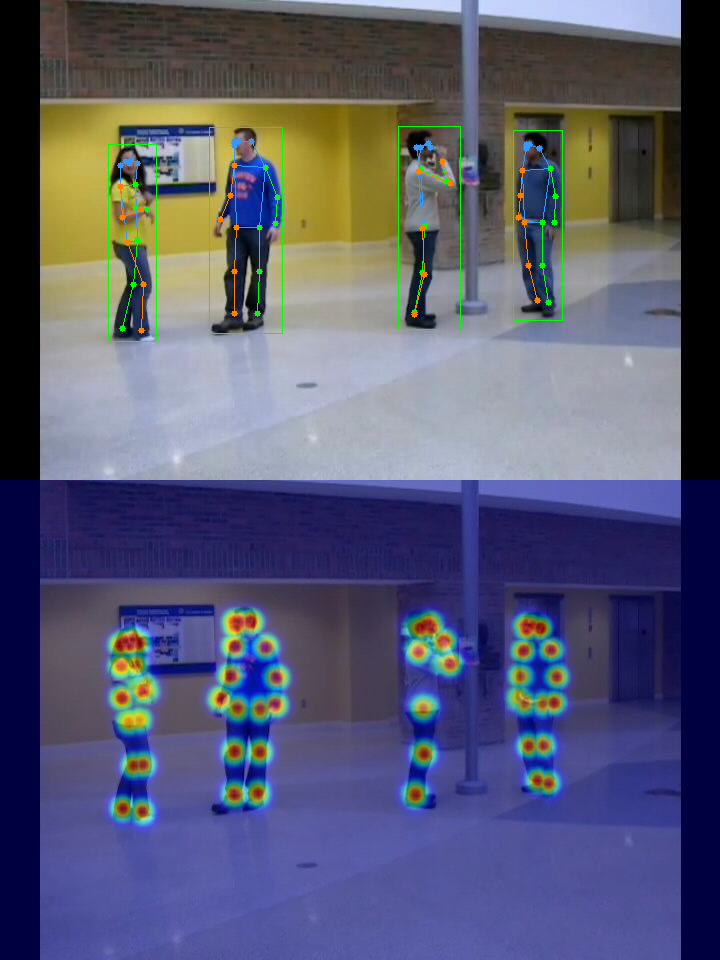

In [21]:
if local_runtime:
    from IPython.display import Image, display
    import tempfile
    import os.path as osp
    import cv2
    with tempfile.TemporaryDirectory() as tmpdir:
        file_name = osp.join(tmpdir, 'pose_results.png')
        cv2.imwrite(file_name, vis_result[:,:,::-1])
        display(Image(file_name))
else:
    cv2_imshow(vis_result[:,:,::-1]) #RGB2BGR to fit cv2

In [16]:
import cv2

# Load the image
image_path = '/content/drive/My Drive/Datasets/Collective_activity_dataset/Skeleton_data_making_sample/frame0052.jpg'
image = cv2.imread(image_path)

# Get image shape (height, width, channels)
height, width, channels = image.shape

print("Original Image Size:", (height, width))


Original Image Size: (480, 720)


In [17]:
from PIL import Image

# Load the image
image = Image.open('/content/drive/My Drive/Datasets/Collective_activity_dataset/Skeleton_data_making_sample/frame0052.jpg' )  # Replace with your actual image path

# Get original size
width, height = image.size

print("Original Image Size:", (height, width))

Original Image Size: (480, 720)


In [34]:
import numpy as np

all_keypoints = []  # Use a list to store keypoints
all_scores = []     # Use a list to store scores

for pose_result in pose_results:
    keypoints = pose_result.pred_instances.keypoints  # Shape: (N, num_keypoints, 2)
    scores = pose_result.pred_instances.keypoint_scores  # Shape: (N, num_keypoints)

    all_keypoints.append(keypoints)
    all_scores.append(scores)

# Convert to numpy arrays after appending all the results
all_keypoints = np.array(all_keypoints)  # Shape: (num_people, num_keypoints, 2)
all_scores = np.array(all_scores)  # Shape: (num_people, num_keypoints)

print("Extracted Keypoints:\n", all_keypoints)
print("Extracted Keypoint Scores:\n", all_scores)


Extracted Keypoints:
 [[[[234.94794 145.05833]
   [238.96425 141.04202]
   [234.94794 141.04202]
   [251.01317 141.04202]
   [234.94794 143.05019]
   [265.07025 167.14803]
   [234.94794 165.13986]
   [277.11917 197.27032]
   [230.93164 195.26216]
   [275.111   223.37631]
   [220.89087 219.36   ]
   [259.04578 227.39262]
   [236.95609 227.39262]
   [259.04578 271.572  ]
   [234.94794 271.572  ]
   [257.03763 313.7432 ]
   [234.94794 313.7432 ]]]


 [[[129.73827 163.08287]
   [131.66637 159.22665]
   [125.88205 161.15475]
   [137.45068 163.08287]
   [120.09774 165.01097]
   [135.52257 184.292  ]
   [120.09774 186.22011]
   [135.52257 207.42926]
   [122.02584 217.06978]
   [147.0912  209.35736]
   [141.30688 209.35736]
   [137.45068 240.20703]
   [127.81016 242.13513]
   [133.59447 284.5534 ]
   [143.23499 284.5534 ]
   [122.02584 328.8998 ]
   [141.30688 330.8279 ]]]


 [[[526.1717  148.55896]
   [529.8871  144.84354]
   [526.1717  144.84354]
   [539.17566 148.55896]
   [526.1717  146.70

In [35]:
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the existing dictionary
result = {
    "keypoint": all_keypoints,
    "keypoint_score": all_scores
}

# Define the additional data
extra_data = {
    'frame_dir': 'S001C001P001R001A001',
    'label': 0,
    'img_shape': (480, 720),
    'original_shape': (480, 720),
    'total_frames': 1
}

# Merge the additional data into the result dictionary
result.update(extra_data)

# Specify the path to save the file in Google Drive
pickle_file = '/content/drive/MyDrive/pose_results_activity.pkl'

# Save the updated dictionary to the pickle file
with open(pickle_file, 'wb') as f:
    pickle.dump(result, f)

print(f"Updated dictionary saved to {pickle_file}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Updated dictionary saved to /content/drive/MyDrive/pose_results_activity.pkl
